# Dataset Exploration: Boston House Pricing
## Bohumír Zámečník
http://www.neural.cz/dataset-exploration-boston-house-pricing.html


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/davewadestein/sf-ml-five-day/refs/heads/main/src/data/Boston.csv

In [36]:
# We will load the Boston dataset directly instead of getting
# it through sklearn.
df = pd.read_csv('Boston.csv')

In [37]:
# count data points and features (attributes)
instance_count, attr_count = df.shape

In [11]:
instance_count

506

In [12]:
attr_count

13

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# CRIM = per capita crime rate by town
# ZN = proportion of residential land zoned for lots over 25,000 sq. ft.
# INDUS = proportion of non-retail business acres per town
# CHAS = Charles River dummy variable
# NOX = nitrogen oxides concentration
# RM = avg. rooms per dwelling
# AGE = proportion of owner-occupied units built prior to 1940
# DIS = weighted mean of distances to five Boston employment centers
# RAD = index of accessibility to radial highways
# TAX = full-value property-tax rate per $10,000
# PTRATIO = pupil-teacher ratio by town
# LSTAT = lower status of the population (percent)

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [15]:
# pandas offers three correlation coefficients via the corr() function:
# Pearson, Spearman rank correlation, and Kendall Tau rank correlation
# We'll use Pearson...

pearson = df.corr(method='pearson')
pearson

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [39]:
# Let's look at correlation with target/answer
corr_with_target = pearson.iloc[-1][:-1]
corr_with_target

,MEDV
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


In [17]:
predictivity = corr_with_target.sort_values(inplace=False, ascending=False)

In [18]:
predictivity

,MEDV
RM,0.695360
ZN,0.360445
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321
TAX,-0.468536
INDUS,-0.483725


In [19]:
# strong negative correlations are important too...
corr_with_target[abs(corr_with_target).argsort()[::-1]]

<ipython-input-19-35f89b45ae63>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_with_target[abs(corr_with_target).argsort()[::-1]]


,MEDV
LSTAT,-0.737663
RM,0.695360
PTRATIO,-0.507787
INDUS,-0.483725
TAX,-0.468536
NOX,-0.427321
CRIM,-0.388305
RAD,-0.381626
AGE,-0.376955
ZN,0.360445


In [40]:
# It might be interesting to select some strong correlations between
# attribute pairs. With a bit of Python magic it is possible:
attrs = pearson.iloc[:-1, :-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [41]:
unique_important_corrs

,attribute pair,correlation
14,"(RAD, TAX)",0.910228
7,"(DIS, NOX)",-0.769230
3,"(INDUS , NOX)",0.763651
16,"(AGE, DIS)",-0.747881
4,"(AGE, NOX)",0.731470
17,"(INDUS , TAX)",0.720760
13,"(DIS, INDUS )",-0.708027
2,"(NOX, TAX)",0.668023
5,"( ZN , DIS)",0.664408
6,"(AGE, INDUS )",0.644779


# Predict

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

In [43]:
y = df.MEDV
X = df[['RM', 'LSTAT', 'PTRATIO', 'INDUS ']]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(X_test))

3.6101935903456988

## Let's Visualize

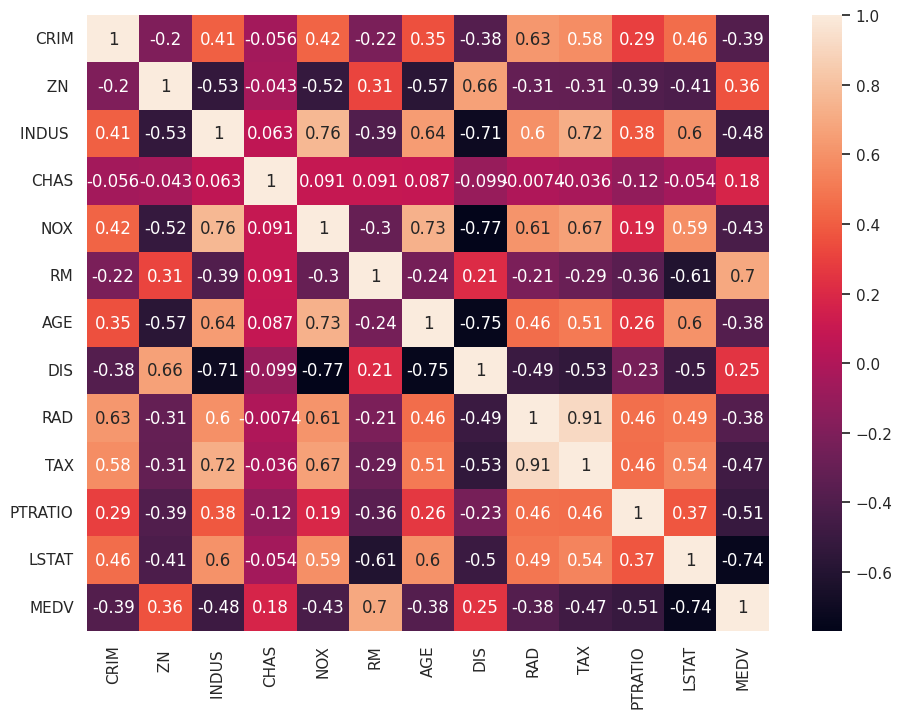

In [45]:
%matplotlib inline
import seaborn as sns  #heatmap replaces corrplot
sns.set(rc={'figure.figsize':(11, 8)})
# Using all correlations
sns.heatmap(pearson, annot=True);

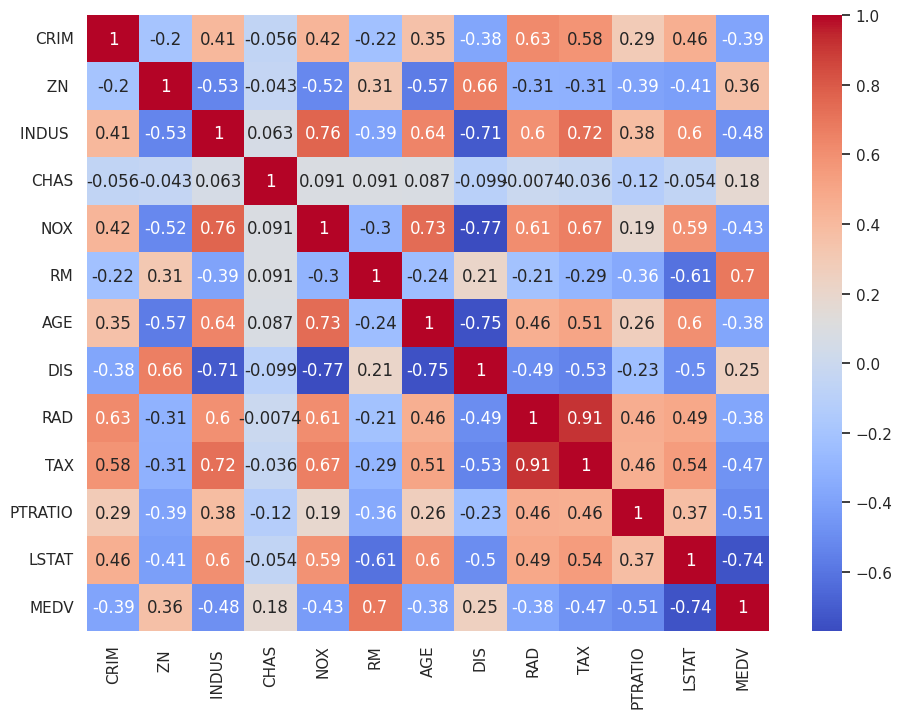

In [46]:
# display annotations and change the colors...
sns.heatmap(pearson, cmap='coolwarm', annot=True);

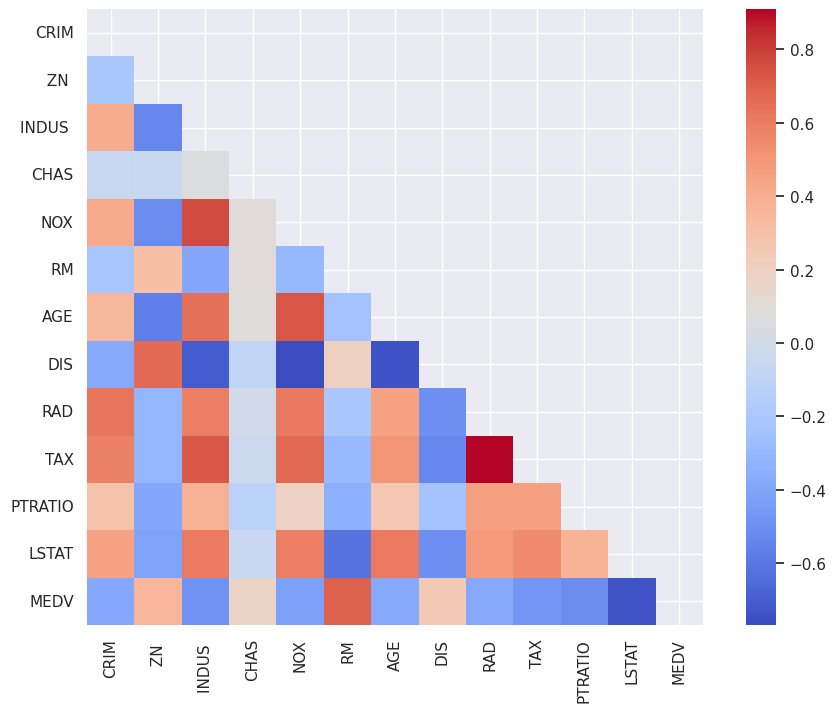

In [47]:
# Generate a mask for the upper triangle / values above the identity diagonal
# Remove use of the mask below to see the "whole" heatmap
mask = np.zeros_like(pearson, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Add square parameter to make cells square, use the mask, remove annot
sns.heatmap(pearson, cmap='coolwarm', mask=mask, square=True);

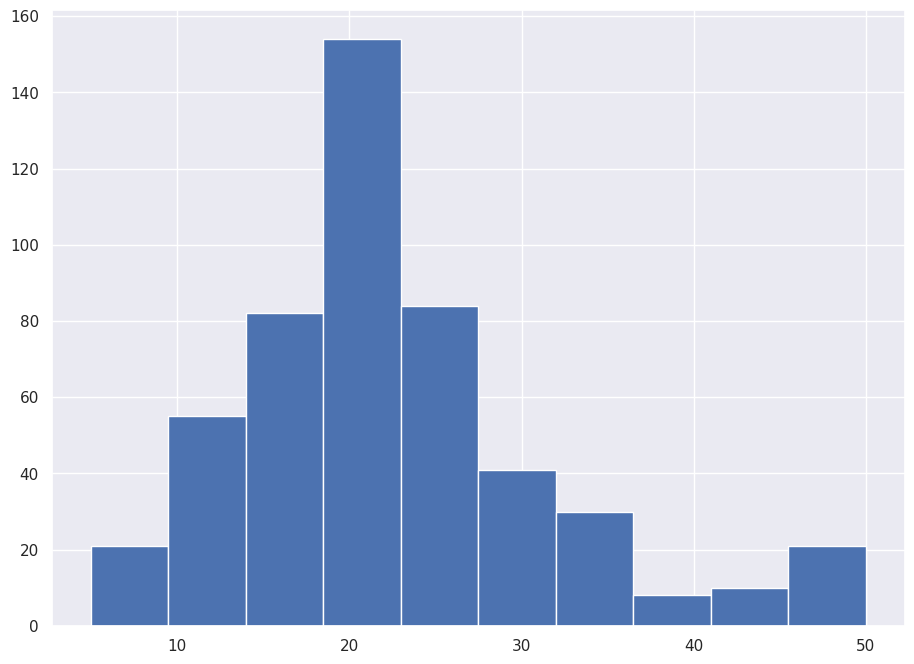

In [48]:
plt.hist(df.MEDV);

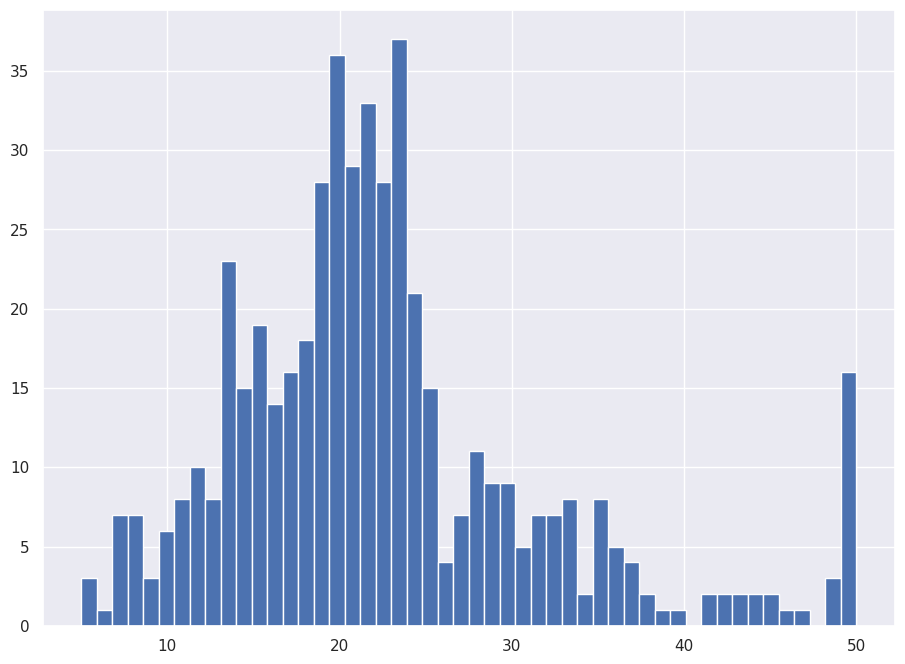

In [51]:
plt.hist(df.MEDV, bins=50);

<ipython-input-55-c07cc316500a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MEDV);


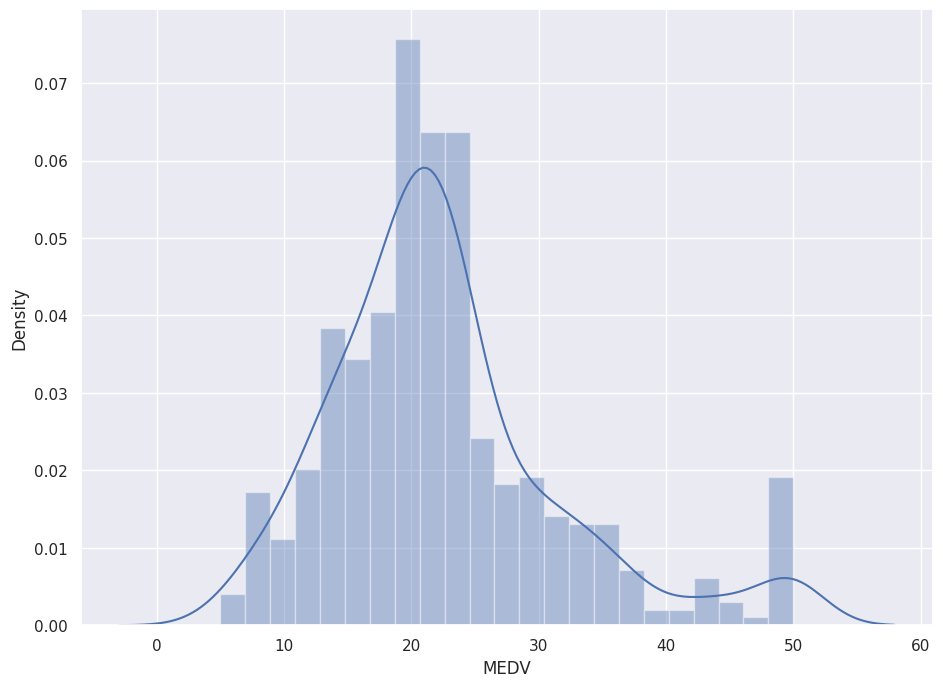

In [55]:
sns.distplot(df.MEDV);

### For integer-valued data (e.g., categories) automatic quantization into a pre-defined number of bins might not be the best option.
### We'd like to quantize according the original distinct values. For that we can just compute this kind of histogram ourselves and use the bar plot.
* Example for __RAD__ int (category) - index of accessibility to radial highways:

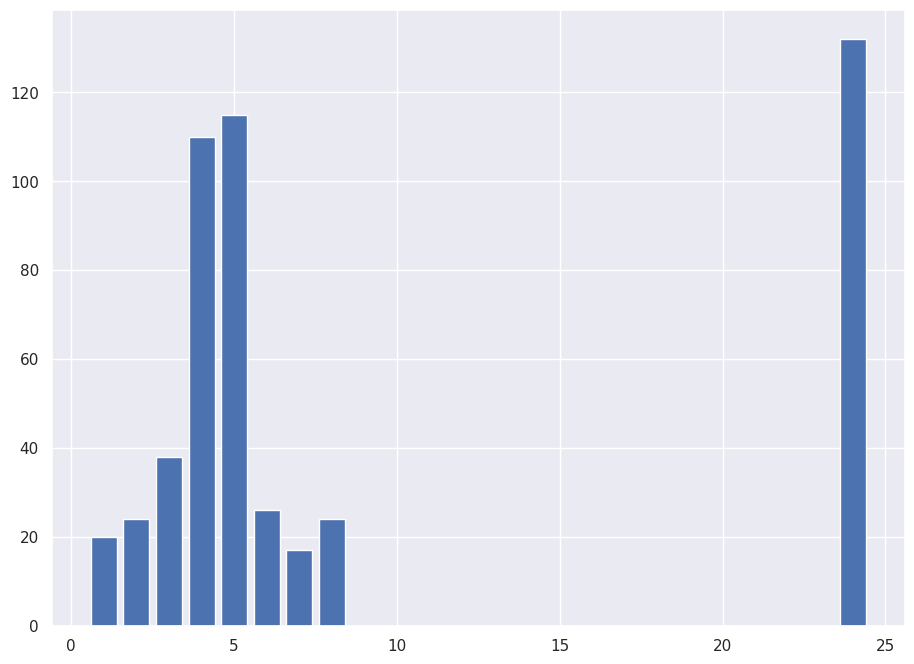

In [56]:
cat_attr = df['RAD']
h = cat_attr.value_counts()
values, counts = h.index, h
plt.bar(values, counts);

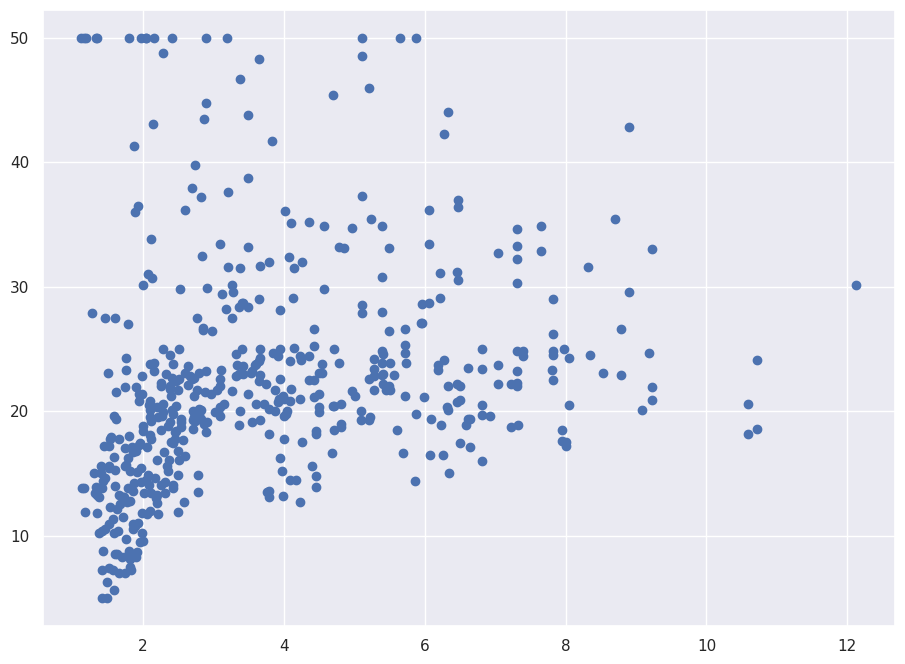

In [57]:
plt.scatter(df['DIS'], df['MEDV']);

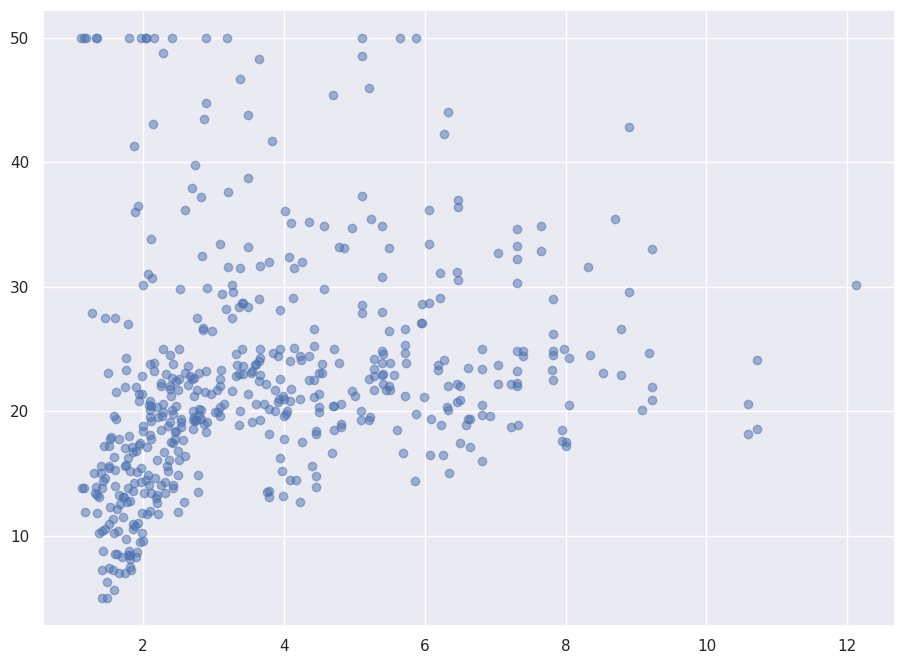

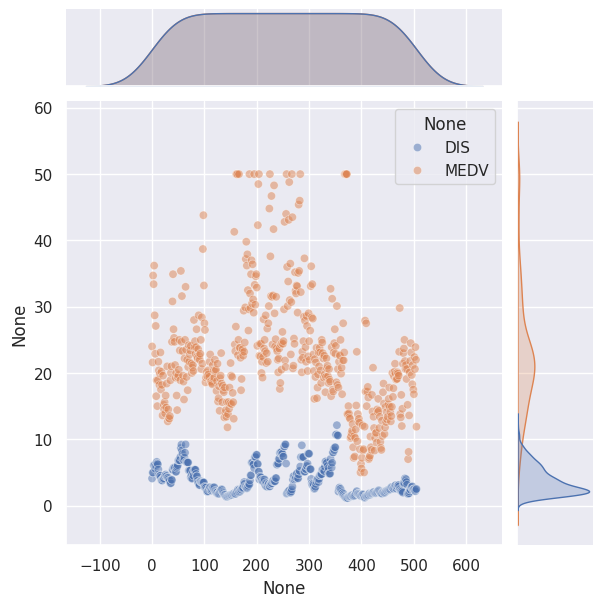

In [63]:
x, y = df['DIS'], df['MEDV']
plt.scatter(x, y, alpha=0.5)
df2 = df[['DIS', 'MEDV']]
# or via jointplot (with histograms aside):
sns.jointplot(data=df2, kind='scatter', joint_kws={'alpha':0.5});

AttributeError: PolyCollection.set() got an unexpected keyword argument 'hue'

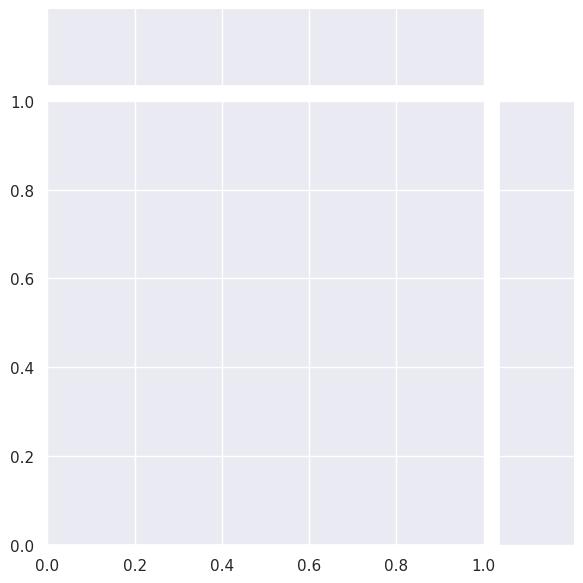

In [67]:
sns.jointplot(data=df2, kind='hex')

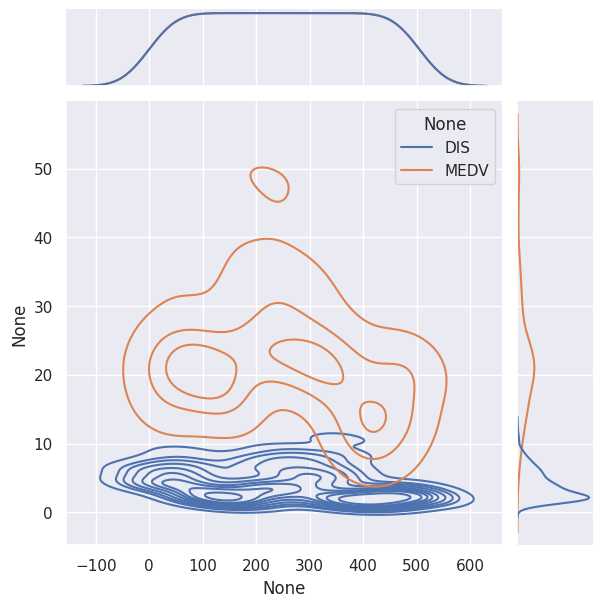

In [69]:
#sns.kdeplot(df['DIS'], df['MEDV'], shade=True)
# or
sns.jointplot(df2, kind='kde');